# Photoionization / radiative recombination + dielectronic recombination

- formula:
  - photoionization: [Tasitsiomi 2006](https://doi.org/10.1086%2F504460) (cross-sections)
  - radiative recombination: [Verner 1995](https://doi.org/10.1086%2F192284)
  - dielectronic recombination: [Badnell 2006](https://doi.org/10.1086%2F508465)
- data:
  - radiative recombination: [Badnell 2006](https://doi.org/10.1086%2F508465)
  - dielectronic recombination: [Badnell 2006](https://doi.org/10.1086%2F508465)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import lss

from utils import *

In [2]:
elements = [
    lss.O1Inasan(),
    lss.O2Inasan(),
]
"""
13S3S - fast level
12P1D4 - 
"""
# elements[0].keys = elements[0].all_keys; elements[1].keys = elements[1].all_keys
elements[0].keys = ["12P3P4"]; elements[1].keys = ["22P4S"]
# elements[0].keys = ["12P1D4"]; elements[1].keys = ["22P4S"]
# elements[0].keys = ["13S3S"]; elements[1].keys = ["22P4S"]

population_nlte_1 = np.zeros(sum([len(el.keys) for el in elements]))
# population_nlte_1[0] = 1.0
population_nlte_1[0] = 0.0
population_nlte_1[1] = 1.0

count = int(1e3)
temperatures = np.full(count, 1.0e4)
electron_temperatures = np.full(count, 1.0e4)
electron_number_densities = np.linspace(1.0e1, 1.0e31, num=count)
optical_depth = 0.0

# delta_time = 0.01
delta_time = 1.0e-20

In [3]:
ri_balance = [
    Transition.PI_TASITSIOMI,
    Transition.RR_BADNELL_VERNER,
    Transition.DR_BADNELL,
]

b_factors = calculate_b_factors(
    elements=elements,
    population_nlte_1=population_nlte_1,
    temperatures=temperatures,
    electron_temperatures=electron_temperatures,
    electron_number_densities=electron_number_densities,
    optical_depth=optical_depth,
    delta_time=delta_time,
    transitions_types=[
        *ri_balance,
    ]
)

/tmp/ipykernel_32402/1587211164.py:5: RuntimeWarning: divide by zero encountered in log10
  np.log10(b_factors.T[i + sum([len(el.keys) for el in elements][:s])]),


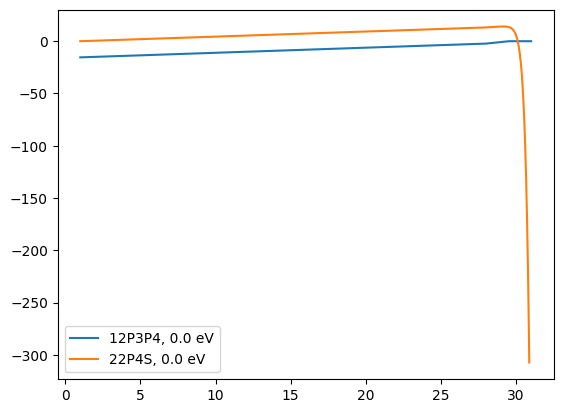

In [4]:
for s, element in enumerate(elements):
    for i, key in enumerate(element.keys):
        plt.plot(
            np.log10(electron_number_densities),
            np.log10(b_factors.T[i + sum([len(el.keys) for el in elements][:s])]),
            label=f"{key}, {'{:.1f}'.format(element.levels[i].energy)} eV",
        )
plt.legend()
plt.show()